PHÂN TÍCH DỮ LIỆU HỌC SINH VÀ KẾT QUẢ THI

Nhóm mình sẽ thực hiện phân tích để trả lời các câu hỏi về Khả năng Dự đoán Kết quả:
   - Dựa trên tương quan giữa các biến:
     * Số giờ học có tương quan như thế nào với kết quả đậu/rớt?
     * Điểm thi trước đó cũng có mối liên hệ gì với kết quả?
   - Có thể xây dựng mô hình dự đoán với độ chính xác khá tốt
   

In [6]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Đọc dữ liệu
df = pd.read_csv("student_exam_data.csv")
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


Phần 1: Tạo một biểu đồ nhiệt (heatmap) để hiển thị mối tương quan giữa các đặc trưng trong dữ liệu.
- Hiển thị trực quan mối quan hệ giữa:
  * Số giờ học (Study Hours)
  * Điểm thi trước đó (Previous Exam Score)
  * Kết quả đậu/rớt (Pass/Fail)
- Giúp xác định:
  * Yếu tố nào ảnh hưởng mạnh nhất đến kết quả
  * Mối liên hệ giữa các yếu tố với nhau
  * Hướng của mối tương quan (dương hay âm)

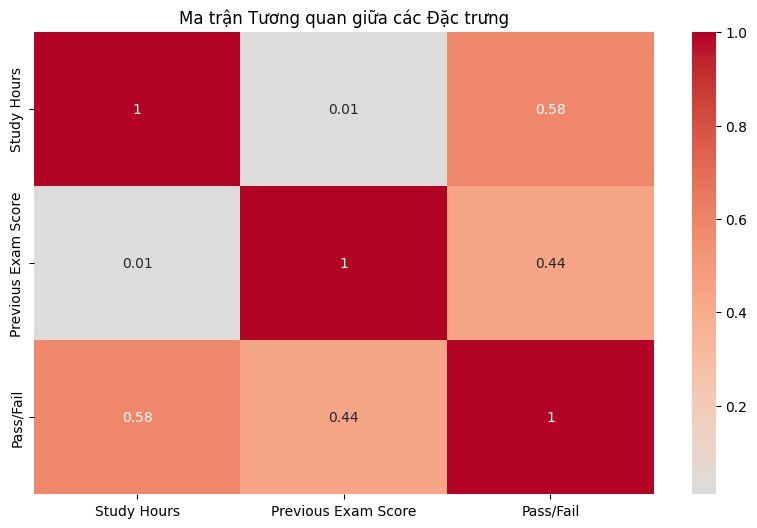

In [7]:
#Phân tích tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận Tương quan giữa các Đặc trưng')
plt.show()

- Yếu tố ảnh hưởng nhiều nhất đến việc đậu/rớt (Pass/Fail) là:
  * Study Hours với hệ số tương quan 0.58
  * Previous Exam Score với hệ số 0.44
- Study Hours và Previous Exam Score gần như không liên quan đến nhau (0.01), cho thấy số giờ học không phản ánh điểm số trước đây (có thể do thói quen học thay đổi hoặc các yếu tố khác).

Phần 2: Phân tích chi tiết về thời gian học của học sinh, so sánh giữa nhóm đậu và rớt.
- So sánh thời gian học trung bình giữa nhóm đậu và rớt

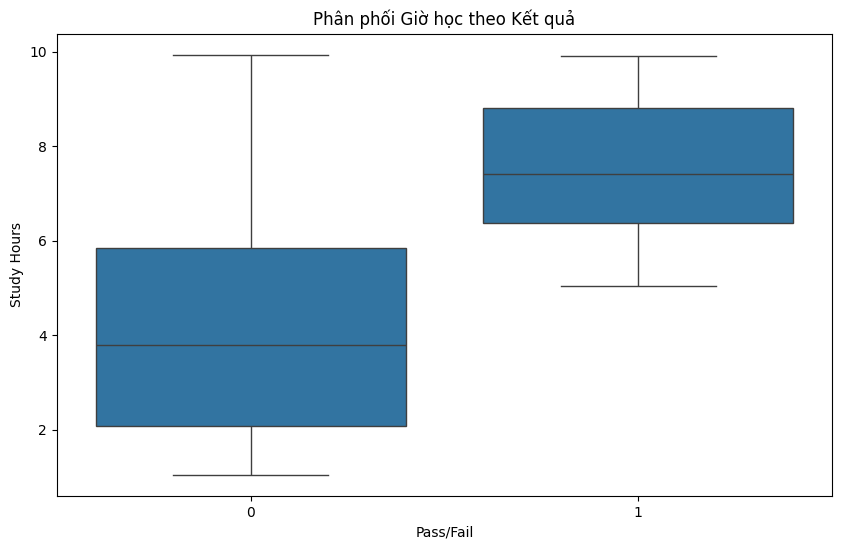

Thống kê Giờ học theo Kết quả:
           count      mean       std       min       25%       50%       75%  \
Pass/Fail                                                                      
0          316.0  4.291317  2.520633  1.045554  2.074601  3.802120  5.852919   
1          184.0  7.540606  1.434995  5.036010  6.365200  7.414408  8.807475   

                max  
Pass/Fail            
0          9.936683  
1          9.914546  


In [8]:
# Phân tích giờ học
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pass/Fail', y='Study Hours', data=df)
plt.title('Phân phối Giờ học theo Kết quả')
plt.show()

# In thống kê
print("Thống kê Giờ học theo Kết quả:")
print(df.groupby('Pass/Fail')['Study Hours'].describe())

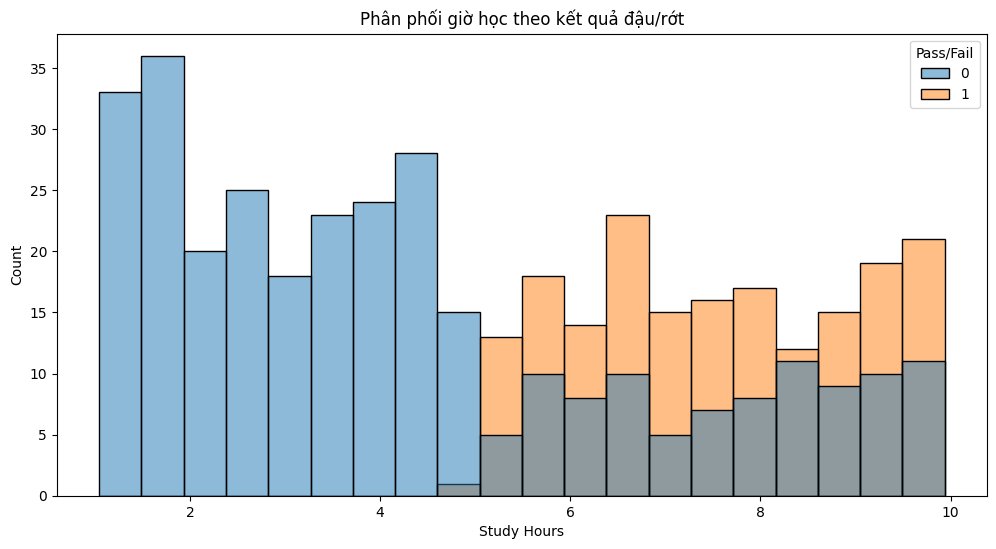

In [9]:
#Phân tích phân phối của các biến
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Study Hours', hue='Pass/Fail', bins=20)
plt.title('Phân phối giờ học theo kết quả đậu/rớt')
plt.show()

- Kết luận rút ra: 
  * Nhóm Đậu (Pass = 1):
      - Thường có số giờ học cao hơn (trung bình > 6 giờ)
      - Điểm thi trước thường ở mức khá trở lên
  * Nhóm Không Đậu (Pass = 0):
      - Số giờ học thấp hơn (thường < 4 giờ)
      - Điểm thi trước đó không cao
  * Tuy nhiên, không tuyệt đối: có người học nhiều nhưng vẫn rớt (9.93 giờ), nên chất lượng học cũng quan trọng.

Phần 3: Xây dựng và đánh giá mô hình dự đoán kết quả học tập
- Đánh giá hiệu quả tổng thể của mô hình
- Xem xét khả năng dự đoán cho từng lớp (đậu/rớt)
- Quyết định xem mô hình có đủ tốt để sử dụng trong thực tế không
- Xác định liệu mô hình có bị thiên lệch về một lớp nào không

In [10]:
# Cell 4 - Huấn luyện và đánh giá mô hình
X, y = df.drop(['Pass/Fail'], axis=1), df['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred):.2f}")
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

Độ chính xác của mô hình: 0.86

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.82      0.78      0.80        36

    accuracy                           0.86       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.86      0.86      0.86       100



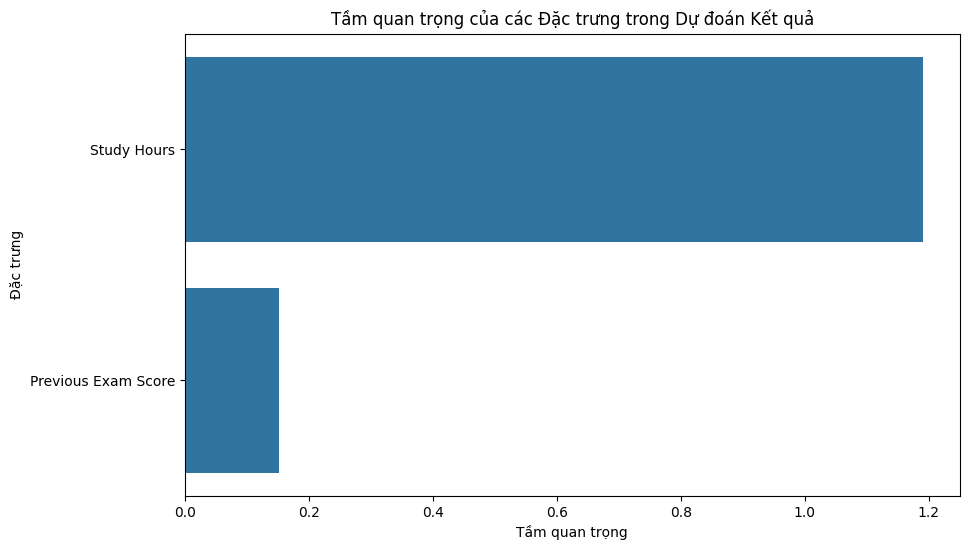

In [11]:
# Cell 5 - Phân tích tầm quan trọng của đặc trưng
feature_importance = pd.DataFrame({
    'Đặc trưng': X.columns,
    'Tầm quan trọng': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Tầm quan trọng', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Tầm quan trọng', y='Đặc trưng', data=feature_importance)
plt.title('Tầm quan trọng của các Đặc trưng trong Dự đoán Kết quả')
plt.show()

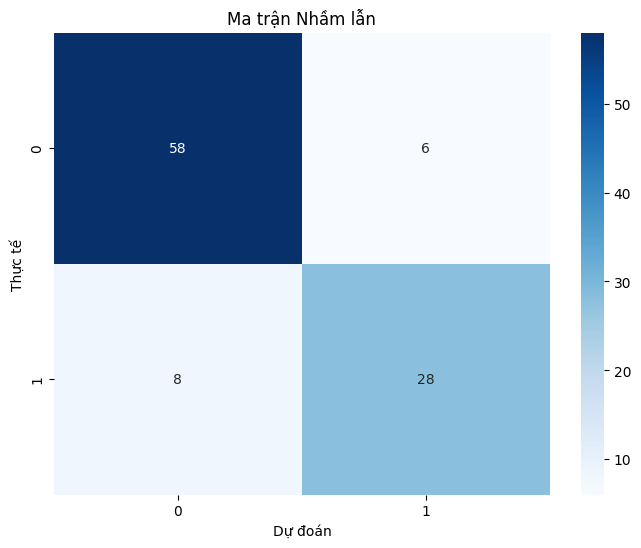

In [12]:
# Cell 6 - Ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận Nhầm lẫn')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()